<a href="https://colab.research.google.com/github/varalakshmiarcot/Titanic-Dataset-using-Logistic-Regression/blob/master/Logistic_Regression_(_Titanic_Dataset_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression on titanic dataset

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Preprocessing](#section3)
4. [Logistic Regression](#section4)<br>
    - 4.1 [Introduction of Logistic Regression](#section401)<br>
    - 4.2 [Mathematics behind Logistic Regression](#section402)<br>
    - 4.3 [Applications of Logistic Regression](#section402)<br>
    - 4.4 [Preparing X and y using pandas](#section403)<br>
    - 4.5 [Splitting X and y into training and test datasets.](#section404)<br>
    - 4.6 [Logistic regression in scikit-learn](#section406)<br>
    - 4.7 [Using the Model for Prediction](#section407)<br>
5. [Model evaluation](#section5)<br>
    - 5.1 [Model Evaluation using accuracy classification score](#section501)<br>
    - 5.2 [Model Evaluation using confusion matrix](#section502)<br> 

### 1. Problem Statement

The goal is to __predict survival__ of passengers travelling in RMS __Titanic__ using __Logistic regression__.

### 2. Data Loading and Description


- The dataset consists of the information about people boarding the famous RMS Titanic. Various variables present in the dataset includes data of age, sex, fare, ticket etc. 
- The dataset comprises of __891 observations of 12 columns__. Below is a table showing names of all the columns and their description.

| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| PassengerId   | Passenger Identity                                        | 
| Survived      | Whether passenger survived or not                         |  
| Pclass        | Class of ticket                                           | 
| Name          | Name of passenger                                         |   
| Sex           | Sex of passenger                                          |
| Age           | Age of passenger                                          |
| SibSp         | Number of sibling and/or spouse travelling with passenger |
| Parch         | Number of parent and/or children travelling with passenger|
| Ticket        | Ticket number                                             |
| Fare          | Price of ticket                                           |
| Cabin         | Cabin number                                              |

#### Importing packages                                          

In [0]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output

#### Importing the Dataset

In [0]:
titanic_data = pd.read_csv("https://raw.githubusercontent.com/varalakshmiarcot/Titanic-Dataset-using-Logistic-Regression/master/titanic_train.csv")     # Importing training dataset using pd.read_csv

In [0]:
# what we have to predict --> Survived Column (Class) --> 0(didn't survive), 1(survived), Categorical Prediction -> Classification 

In [10]:
titanic_data.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<a id=section3></a>

## 3. Preprocessing the data

- Dealing with missing values<br/>
    - Dropping/Replacing missing entries of __Embarked.__
    - Replacing missing values of __Age__ and __Fare__ with median values.
    - Dropping the column __'Cabin'__ as it has too many _null_ values.

In [11]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   PassengerId  891 non-null    int64  
 2   Survived     891 non-null    int64  
 3   Pclass       891 non-null    int64  
 4   Name         891 non-null    object 
 5   Sex          891 non-null    object 
 6   Age          714 non-null    float64
 7   SibSp        891 non-null    int64  
 8   Parch        891 non-null    int64  
 9   Ticket       891 non-null    object 
 10  Fare         891 non-null    float64
 11  Cabin        204 non-null    object 
 12  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [12]:
titanic_data['Embarked'].mode()[0]

'S'

In [0]:
titanic_data.Embarked = titanic_data.Embarked.fillna(titanic_data['Embarked'].mode()[0])

In [0]:
median_age = titanic_data.Age.median()
#median_fare = titanic_data.Fare.median()
titanic_data.Age.fillna(median_age, inplace = True)
#titanic_data.Fare.fillna(median_fare, inplace = True)

In [0]:
titanic_data.drop('Cabin', axis = 1,inplace = True)

In [16]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   PassengerId  891 non-null    int64  
 2   Survived     891 non-null    int64  
 3   Pclass       891 non-null    int64  
 4   Name         891 non-null    object 
 5   Sex          891 non-null    object 
 6   Age          891 non-null    float64
 7   SibSp        891 non-null    int64  
 8   Parch        891 non-null    int64  
 9   Ticket       891 non-null    object 
 10  Fare         891 non-null    float64
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


- Creating a new feature named __FamilySize__.

# Feature Engineering Part; Create new columns out of existing data 

### Dummy variable, or categorical encoding are not FE 
### If you have dervied value from particular column, make sure to drop original columns 


In [0]:
#family size
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch']+1

#accompany
titanic_data['accompany'] = titanic_data['SibSp'] + titanic_data['Parch']

- Segmenting __Sex__ column as per __Age__, Age less than 15 as __Child__, Age greater than 15 as __Males and Females__ as per their gender.

In [0]:
titanic_data['GenderClass'] = titanic_data.apply(lambda x: 'child' if x['Age'] < 15 else x['Sex'],axis=1)

In [19]:
titanic_data[titanic_data.Age<15].head(5)

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,accompany,GenderClass
7,7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,5,4,child
9,9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,2,1,child
10,10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S,3,2,child
14,14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,S,1,0,child
16,16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,Q,6,5,child


In [20]:
titanic_data[titanic_data.Age>15].head(5)

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,accompany,GenderClass
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,1,male
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,1,female
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,female
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,1,female
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,male


- __Dummification__ of __GenderClass__ & __Embarked__.

- __Dropping__ columns __'Name' , 'Ticket' , 'Sex' , 'SibSp' and 'Parch'__ 

In [21]:
titanic = titanic_data.drop(['Name','Ticket','Sex','SibSp','Parch', 'PassengerId'], axis = 1)
titanic.head()

,Unnamed: 0,Survived,Pclass,Age,Fare,Embarked,FamilySize,accompany,GenderClass
0,0,0,3,22.0,7.2500,S,2,1,male
1,1,1,1,38.0,71.2833,C,2,1,female
2,2,1,3,26.0,7.9250,S,1,0,female
3,3,1,1,35.0,53.1000,S,2,1,female
4,4,0,3,35.0,8.0500,S,1,0,male


In [22]:
titanic.info()
# goal is to convert everything into Numerical Cont 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   Fare         891 non-null    float64
 5   Embarked     891 non-null    object 
 6   FamilySize   891 non-null    int64  
 7   accompany    891 non-null    int64  
 8   GenderClass  891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [0]:
# When we have Categories (Non-Ordinal) --> COnvert into Dummies 
# Don't convert Pclass,Family Size, accompy to Dummy, because it's Ordinal Discret Category 
titanic = pd.get_dummies(titanic, columns=['GenderClass','Embarked'])

In [24]:
titanic.head()

,Unnamed: 0,Survived,Pclass,Age,Fare,FamilySize,accompany,GenderClass_child,GenderClass_female,GenderClass_male,Embarked_C,Embarked_Q,Embarked_S
0,0,0,3,22.0,7.2500,2,1,0,0,1,0,0,1
1,1,1,1,38.0,71.2833,2,1,0,1,0,1,0,0
2,2,1,3,26.0,7.9250,1,0,0,1,0,0,0,1
3,3,1,1,35.0,53.1000,2,1,0,1,0,0,0,1
4,4,0,3,35.0,8.0500,1,0,0,0,1,0,0,1


In [25]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          891 non-null    int64  
 1   Survived            891 non-null    int64  
 2   Pclass              891 non-null    int64  
 3   Age                 891 non-null    float64
 4   Fare                891 non-null    float64
 5   FamilySize          891 non-null    int64  
 6   accompany           891 non-null    int64  
 7   GenderClass_child   891 non-null    uint8  
 8   GenderClass_female  891 non-null    uint8  
 9   GenderClass_male    891 non-null    uint8  
 10  Embarked_C          891 non-null    uint8  
 11  Embarked_Q          891 non-null    uint8  
 12  Embarked_S          891 non-null    uint8  
dtypes: float64(2), int64(5), uint8(6)
memory usage: 54.1 KB


Drawing __pair plot__ to know the joint relationship between __'Fare' , 'Age' , 'Pclass' & 'Survived'__

Text(0.5, 1.0, 'Pair Plot')

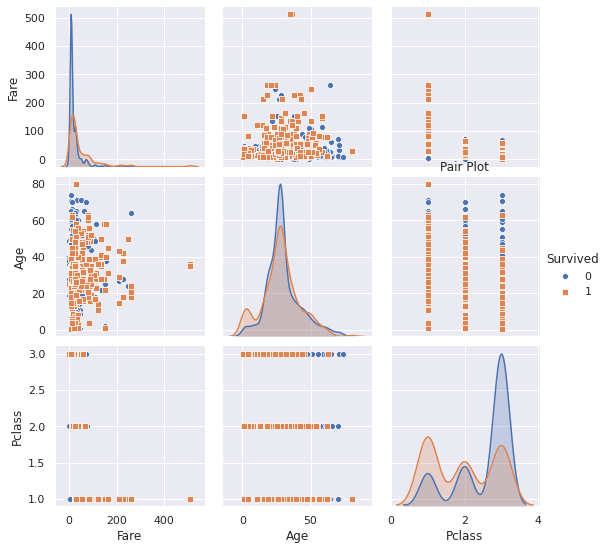

In [26]:
sns.pairplot(titanic_data[["Fare","Age","Pclass","Survived"]],vars = ["Fare","Age","Pclass"],hue="Survived", dropna=True,markers=["o", "s"])
plt.title('Pair Plot')

Observing the diagonal elements,
- More people of __Pclass 1__ _survived_ than died (First peak of red is higher than blue)
- More people of __Pclass 3__ _died_ than survived (Third peak of blue is higher than red)
- More people of age group __20-40 died__ than survived.
- Most of the people paying __less fare died__.

Establishing __coorelation__ between all the features using __heatmap__.

Text(0.5, 1.0, 'Correlation between features')

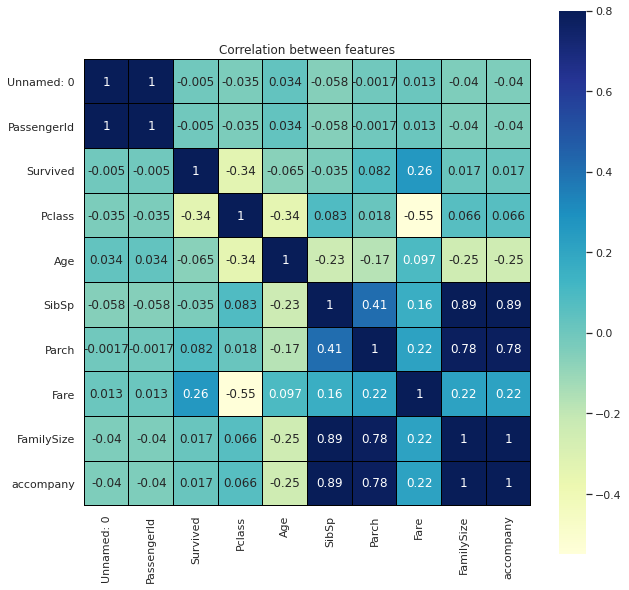

In [27]:
corr = titanic_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

- __Age and Pclass are negatively corelated with Survived.__
- FamilySize is made from Parch and SibSb only therefore high positive corelation among them.
- __Fare and FamilySize__ are __positively coorelated with Survived.__
- With high corelation we face __redundancy__ issues.

<a id=section4></a>

## 4. Logistic Regression

<a id=section401></a>

### 4.1 Introduction to Logistic Regression

Logistic regression is a techinque used for solving the __classification problem__.<br/> And Classification is nothing but a problem of __identifing__ to which of a set of __categories__ a new observation belongs, on the basis of _training dataset_ containing observations (or instances) whose categorical membership is known. <br/>For example to predict:<br/> __Whether an email is spam (1) or not (0)__ or,<br/> __Whether the tumor is malignant (1) or not (0)<br/>__
Below is the pictorial representation of a basic logistic regression model to classify set of images into _happy or sad._


Both Linear regression and Logistic regression are __supervised learning techinques__. But for the _Regression_ problem the output is __continuous__ unlike the _classification_ problem where the output is __discrete__. <br/>
- Logistic Regression is used when the __dependent variable(target) is categorical__.<br/>
- __Sigmoid function__ or logistic function is used as _hypothesis function_ for logistic regression. Below is a figure showing the difference between linear regression and logistic regression, Also notice that logistic regression produces a logistic curve, which is limited to values between 0 and 1. <br/> 



<a id=section402></a>

## 4.2 Mathematics behind Logistic Regression

The __odds__ for an event is the __(probability of an event occuring) / (probability of event not occuring)__:
![image.png](attachment:image.png)
For __Linear regression__: continuous response is modeled as a linear combination of the features: __y = β0 + β1x__<br/>
For __Logistic regression__: log-odds of a categorical response being "__true__" (1) is modeled as a linear combination of the features:


This is called the __logit function__.<br/>


In other words:

- Logistic regression outputs the __probabilities of a specific class__.
- Those probabilities can be converted into __class predictions__.


The logistic function has some nice properties:

- Takes on an __"s"__ shape
- Output is bounded by __0 and 1__<br/>


We have covered how this works for binary classification problems (two response classes). But what about __multi-class classification problems__ (more than two response classes)?

- Most common solution for classification models is __"one-vs-all"__ (also known as __"one-vs-rest"__): decompose the problem into multiple binary classification problems.
- __Multinomial logistic regression__ can solve this as a single problem.

## 4.3 __Applications of Logistic Regression__

Logistic Regression was used in __biological sciences__ in early twentieth century. It was then used in many social science applications. For instance,
- The Trauma and Injury Severity Score (TRISS), which is widely used to __predict mortality in injured patients__, was originally developed by Boyd et al. using logistic regression.<br/> 
- Many other medical scales used to __assess severity__ of a patient have been developed using logistic regression.<br/>
- Logistic regression may be used to __predict the risk of developing a given disease__ (e.g. diabetes; coronary heart disease), based on observed characteristics of the patient (age, sex, body mass index, results of various blood tests, etc.).<br/>

Now a days, Logistic Regression have the following applications 
1. Image segementation and  categorization
2. Geographic image processing
3. Handwriting recognition
4. Detection of  myocardinal infarction
5. Predict whether a person is depressed or not based on a bag of words from corpus. 
![image.png](attachment:image.png)

The reason why logistic regression is widely used despite of the state of the art of deep neural network is that logistic regression is very __efficient__ and does __not__ require too much __computational resources__, which makes it __affordable__ to run on production.

## 4.4 Preparing X and y using pandas

In [28]:
X = titanic.loc[:,titanic.columns != 'Survived']
X.head()

,Unnamed: 0,Pclass,Age,Fare,FamilySize,accompany,GenderClass_child,GenderClass_female,GenderClass_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,2,1,0,0,1,0,0,1
1,1,1,38.0,71.2833,2,1,0,1,0,1,0,0
2,2,3,26.0,7.9250,1,0,0,1,0,0,0,1
3,3,1,35.0,53.1000,2,1,0,1,0,0,0,1
4,4,3,35.0,8.0500,1,0,0,0,1,0,0,1


In [0]:
y = titanic.Survived 

In [30]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

## 4.5 Splitting X and y into training and test datasets.

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [32]:
print(X_train.shape)
print(y_train.shape)

(712, 12)
(712,)


## 4.6 Logistic regression in scikit-learn

To apply any machine learning algorithm on your dataset, basically there are 4 steps:
1. Load the algorithm
2. Instantiate and Fit the model to the training dataset
3. Prediction on the test set
4. Calculating the accuracy of the model

The code block given below shows how these steps are carried out:<br/>

``` from sklearn.linear_model import LogisticRegression
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    accuracy_score(y_test,y_pred_test))
    ```

In [38]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression() # this is base model, because no parameters 
logreg.fit(X_train,y_train) # It trains the model on Train Data 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), 
      "penalty":["l1","l2"], 
      "tol":[0.01,0.001,0.0001]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITER

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'tol': [0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [35]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l2', 'tol': 0.01}
accuracy : 0.8386345852895148


## 4.7 Using the Model for Prediction

In [0]:
y_pred_train = logreg.predict(X_train)  # this if for train accuracy 

In [40]:
logreg.predict_proba(X_train)[0]

array([0.97358872, 0.02641128])

In [0]:
y_pred_test = logreg.predict(X_test) # this for test accuracy                                                            # make predictions on the testing set

- We need an evaluation metric in order to compare our predictions with the actual values.

<a id = section5></a>

## 5. Model evaluation 

__Error__ is the _deviation_ of the values _predicted_ by the model with the _true_ values.<br/>
We will use __accuracy score __ and __confusion matrix__ for evaluation.

### 5.1 Model Evaluation using __accuracy classification score__

In [42]:
len(y_test)

179

In [43]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))

Accuracy score for test data is: 0.7988826815642458


In [44]:
y_test

862    1
223    0
84     1
680    0
535    1
      ..
796    1
815    0
629    0
421    0
448    1
Name: Survived, Length: 179, dtype: int64

In [45]:
y_test

862    1
223    0
84     1
680    0
535    1
      ..
796    1
815    0
629    0
421    0
448    1
Name: Survived, Length: 179, dtype: int64

In [46]:
y_pred_test

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1])

### 5.2 Model Evaluation using confusion matrix

A __confusion matrix__ is a __summary__ of prediction results on a classification problem.

The number of correct and incorrect predictions are summarized with count values and broken down by each class. <br/>
Below is a diagram showing a general confusion matrix.
![image.png](attachment:image.png)

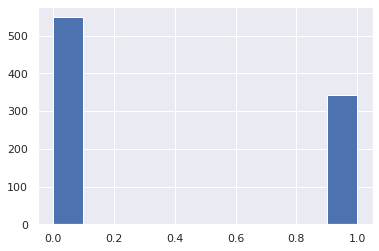

In [47]:
titanic['Survived'].hist()

In [48]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))

print(confusion_matrix)

    0   1
0  95  11
1  25  48


In [49]:
confusion_matrix.index = ['Actual Died','Actual Survived']
confusion_matrix.columns = ['Predicted Died','Predicted Survived']
print(confusion_matrix)

                 Predicted Died  Predicted Survived
Actual Died                  95                  11
Actual Survived              25                  48


This means 93 + 48 = __141 correct predictions__ & 25 + 13 = __38 false predictions__.

__Adjusting Threshold__ for predicting Died or Survived.

- In the section [4.7](#section4.7) we have used, __.predict__ method for classification. This method takes 0.5 as the default threshhod for prediction.<br/>
- Now, we are going to see the impact of changing threshold on the accuracy of our logistic regression model. <br/>
- For this we are going to use __.predict_proba__ method instead of using .predict method. 

Setting the threshold to __0.75__

In [50]:
preds1 = np.where(logreg.predict_proba(X_test)[:,1]> 0.75,1,0)
print('Accuracy score for test data is:', accuracy_score(y_test,preds1))

Accuracy score for test data is: 0.7430167597765364


The accuracy have been __reduced__ significantly changing from __0.79 to 0.73__. Hence, 0.75 is __not a good threshold__ for our model. 

Setting the threshold to __0.25__

In [51]:
preds2 = np.where(logreg.predict_proba(X_test)[:,1]> 0.25,1,0)
print('Accuracy score for test data is:', accuracy_score(y_test,preds2))

Accuracy score for test data is: 0.7653631284916201


The accuracy have been __reduced__, changing from __0.79 to 0.75__. Hence, 0.25 is also __not a good threshold__ for our model. <br/>
Later on we will see methods to identify the best threshold. 